<a href="https://colab.research.google.com/github/vivek2002-deb/Mini-Project/blob/main/Forecasting_by_fbprophet_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly
import plotly.offline as py

In [96]:
df = pd.read_csv(r'/content/sample_data/owid-covid-data.csv' , header=0 , parse_dates=[3])

In [97]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


<Figure size 576x576 with 0 Axes>

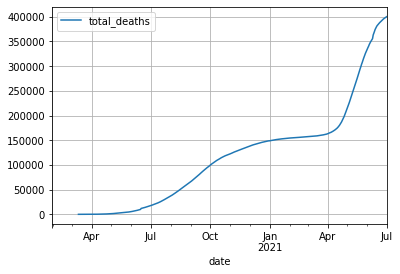

In [98]:
## plot for INDIA

plt.figure(figsize=(8,8))
df.set_index('date').query("location=='India'")[['total_deaths']].plot()
plt.grid()
plt.show()

<Figure size 576x576 with 0 Axes>

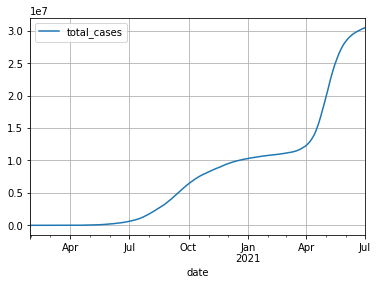

In [99]:
plt.figure(figsize=(8,8))
df.set_index('date').query("location=='India'")[['total_cases']].plot()
plt.grid()
plt.show()

<Figure size 576x576 with 0 Axes>

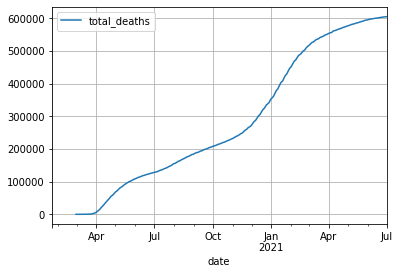

In [100]:
## plot for USA

plt.figure(figsize=(8,8))
df.set_index('date').query("location=='United States'")[['total_deaths']].plot()
plt.grid()
plt.show()

<Figure size 576x576 with 0 Axes>

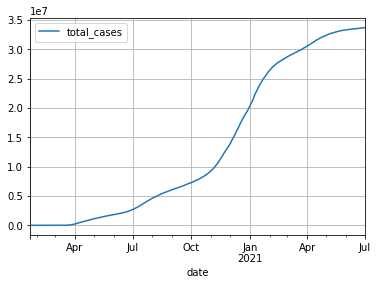

In [101]:
plt.figure(figsize=(8,8))
df.set_index('date').query("location=='United States'")[['total_cases']].plot()
plt.grid()
plt.show()

In [146]:
df_copy = df.copy()

In [147]:
df_copy_1 = df_copy.groupby('location')['new_deaths'].sum()

In [148]:
df_copy_2 = df_copy.groupby('location')['new_cases'].sum()

In [149]:
df_copy_1

location
Afghanistan             4962.0
Africa                143740.0
Albania                 2456.0
Algeria                 3726.0
Andorra                  127.0
                       ...    
Wallis and Futuna          0.0
World                3955662.0
Yemen                   1361.0
Zambia                  2271.0
Zimbabwe                1808.0
Name: new_deaths, Length: 230, dtype: float64

In [150]:
df_copy_2

location
Afghanistan             120216.0
Africa                 5547415.0
Albania                 132523.0
Algeria                 140075.0
Andorra                  13918.0
                        ...     
Wallis and Futuna            0.0
World                182166276.0
Yemen                     6923.0
Zambia                  157832.0
Zimbabwe                 51221.0
Name: new_cases, Length: 230, dtype: float64

In [151]:
df_copy_1 = df_copy_1.drop(labels=['Africa','Asia','Europe','North America','South America','Oceania','World','European Union'])

In [152]:
df_copy_2 = df_copy_2.drop(labels=['Africa','Asia','Europe','North America','South America','Oceania','World','European Union'])

In [153]:
df_final = pd.concat([df_copy_1,df_copy_2] , axis=1)

In [154]:
df_final

,new_deaths,new_cases
location,,
Afghanistan,4962.0,120216.0
Albania,2456.0,132523.0
Algeria,3726.0,140075.0
Andorra,127.0,13918.0
Angola,903.0,38965.0
...,...,...
Vietnam,81.0,17727.0
Wallis and Futuna,0.0,0.0
Yemen,1361.0,6923.0


In [155]:
df_final = df_final.reset_index()

In [156]:
df_final.head()

,location,new_deaths,new_cases
0,Afghanistan,4962.0,120216.0
1,Albania,2456.0,132523.0
2,Algeria,3726.0,140075.0
3,Andorra,127.0,13918.0
4,Angola,903.0,38965.0


In [157]:
print(max(df_final['new_deaths']) , min(df_final['new_deaths']) , max(df_final['new_cases']) , min(df_final['new_cases']))

605019.0 0.0 33679432.0 0.0


In [158]:
np.where(df_final['new_cases']==0.0)

(array([  5,   9,  21,  24,  28,  37,  45,  50,  66,  67,  71,  77,  79,
         82,  97, 102, 119, 135, 140, 143, 149, 159, 166, 179, 200, 204,
        205, 206, 218]),)

In [159]:
df_final = df_final.drop(index=[ 5,   9,  21,  24,  28,  37,  45,  50,  66,  67,  71,  77,  79,
         82,  97, 102, 119, 135, 140, 143, 149, 159, 166, 179, 200, 204,
        205, 206, 218 ])

In [160]:
print(max(df_final['new_deaths']) , min(df_final['new_deaths']) , max(df_final['new_cases']) , min(df_final['new_cases']))

605019.0 0.0 33679432.0 1.0


In [161]:
np.where(df_final['new_deaths']==605019.0)

(array([183]),)

In [162]:
np.where(df_final['new_deaths']==0.0)

(array([ 48,  90, 109, 113, 147, 158, 187]),)

In [163]:
np.where(df_final['new_cases']==33679432.0)

(array([183]),)

In [164]:
np.where(df_final['new_cases']==1.0)

(array([113]),)

In [175]:
df_final.iloc[183]

location      United States
new_deaths           605019
new_cases       3.36794e+07
Name: 211, dtype: object

In [176]:
df_final.iloc[48]

location      Dominica
new_deaths           0
new_cases          193
Name: 56, dtype: object

In [177]:
df_final.iloc[183]

location      United States
new_deaths           605019
new_cases       3.36794e+07
Name: 211, dtype: object

In [172]:
df_final.iloc[113]

location      Micronesia (country)
new_deaths                       0
new_cases                        1
Name: 130, dtype: object

In [168]:
print("Country having highest number of deaths :---" , df_final['location'][211])

Country having highest number of deaths :--- United States


In [170]:
print("Country having lowest number of deaths :---" , df_final['location'][56])

Country having lowest number of deaths :--- Dominica


In [171]:
print("Country having highest number of cases :---" , df_final['location'][211])

Country having highest number of cases :--- United States


In [174]:
print("Country having lowest number of cases :---" , df_final['location'][130])

Country having lowest number of cases :--- Micronesia (country)


In [178]:
## MODEL of deaths for INDIA

In [179]:
df_death_INDIA = df.query("location=='India'")[['date','total_deaths']].rename({'date':'ds' , 'total_deaths':'y'} , axis=1)

In [180]:
df_death_INDIA.isnull().sum()

ds     0
y     41
dtype: int64

In [181]:
df_death_INDIA['y'] = df_death_INDIA['y'].fillna(0)

In [182]:
model = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.98)
model.fit(df_death_INDIA)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [183]:
future = model.make_future_dataframe(periods=30)

In [184]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,40.078707,-1295.057352,1369.350748
1,2020-01-31,50.782335,-1306.091441,1364.987229
2,2020-02-01,36.085059,-1320.516881,1442.177249
3,2020-02-02,1.916876,-1267.548986,1354.270673
4,2020-02-03,-58.800868,-1505.561426,1270.306495
...,...,...,...,...
544,2021-07-27,422388.990683,405288.697974,443169.699751
545,2021-07-28,423251.237603,404496.056554,444777.916928
546,2021-07-29,424157.105303,404840.306080,447713.298514
547,2021-07-30,425029.405126,404355.838447,448624.895058


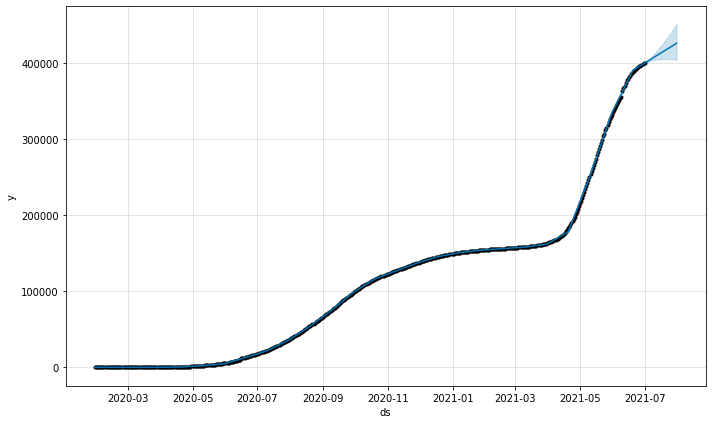

In [185]:
model.plot(forecast);

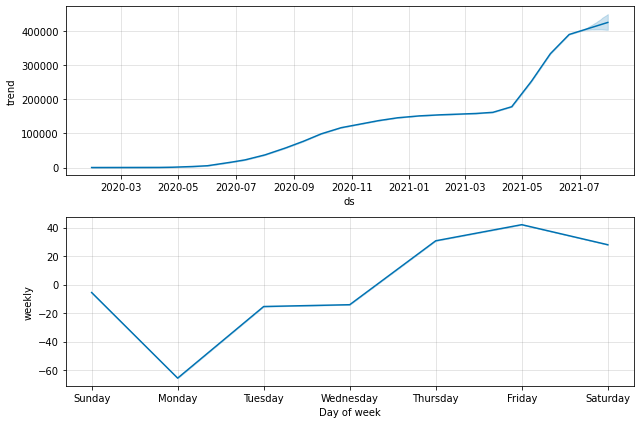

In [186]:
model.plot_components(forecast);

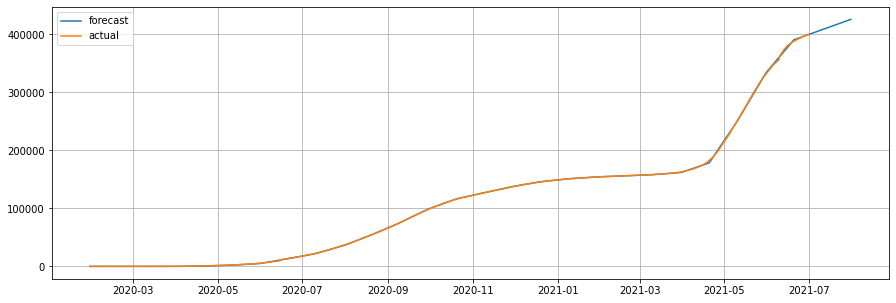

In [187]:
plt.figure(figsize=(15,5))
plt.plot(forecast['ds'],forecast['yhat'])
plt.plot(df_death_INDIA['ds'],df_death_INDIA['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

In [188]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv2 = cross_validation(model, cutoffs=cutoffs, horizon='150 days')
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-12-03 00:00:00 and 2021-02-01 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
131,146 days,2.343698e+10,153091.424334,118245.376820,0.336139,0.360944,0.5
132,147 days,2.371167e+10,153985.943181,118034.572268,0.331420,0.359933,0.5
133,148 days,2.396130e+10,154794.385785,117679.506001,0.326301,0.358184,0.5
134,149 days,2.419310e+10,155541.322449,117397.622903,0.321767,0.355799,0.5
135,150 days,2.440811e+10,156230.947069,117199.156252,0.317854,0.352605,0.5


In [189]:
## Model of cases for INDIA

In [190]:
df_cases_INDIA = df.query("location=='India'")[['date','total_cases']].rename({'date':'ds' , 'total_cases':'y'} , axis=1)

In [191]:
df_cases_INDIA.isnull().sum()

ds    0
y     0
dtype: int64

In [192]:
df_cases_INDIA['y'] = df_cases_INDIA['y'].fillna(0)

In [193]:
model_1 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.98)
model_1.fit(df_cases_INDIA)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [194]:
future_1 = model_1.make_future_dataframe(periods=30)

In [195]:
forecast_1 = model_1.predict(future)
forecast_1[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,1.237565e+03,-1.284204e+05,1.367213e+05
1,2020-01-31,2.271081e+03,-1.459351e+05,1.384871e+05
2,2020-02-01,3.215471e+03,-1.229897e+05,1.410416e+05
3,2020-02-02,1.249535e+03,-1.350227e+05,1.267648e+05
4,2020-02-03,-6.317357e+03,-1.441548e+05,1.395672e+05
...,...,...,...,...
544,2021-07-27,3.165306e+07,2.981161e+07,3.371842e+07
545,2021-07-28,3.170289e+07,2.984392e+07,3.386837e+07
546,2021-07-29,3.175011e+07,2.973985e+07,3.413232e+07
547,2021-07-30,3.179711e+07,2.962981e+07,3.414383e+07


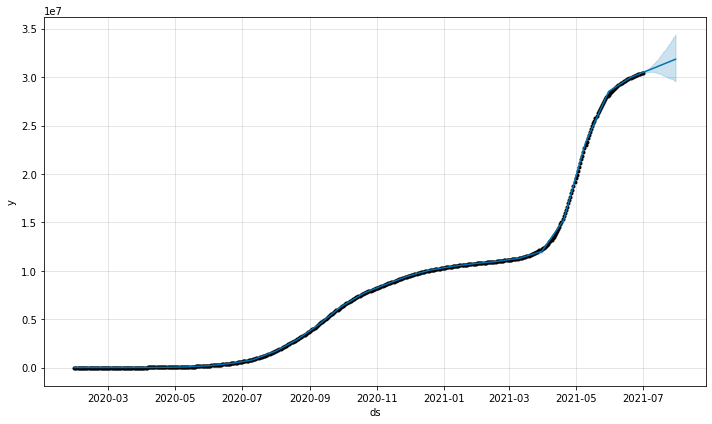

In [196]:
model_1.plot(forecast_1);

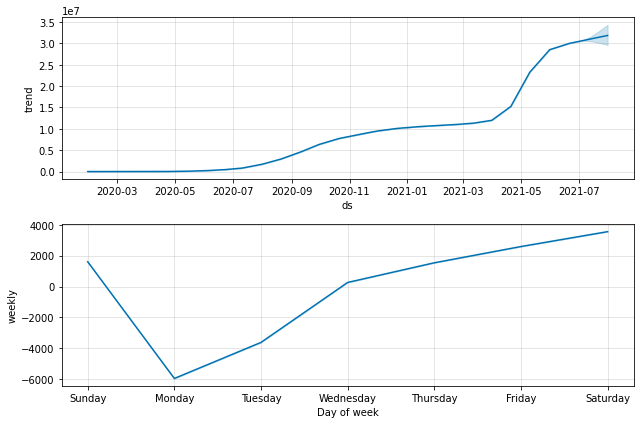

In [197]:
model_1.plot_components(forecast_1);

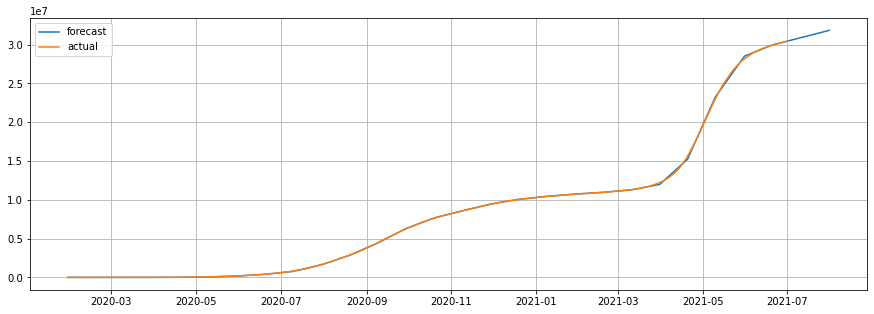

In [198]:
plt.figure(figsize=(15,5))
plt.plot(forecast_1['ds'],forecast_1['yhat'])
plt.plot(df_cases_INDIA['ds'],df_cases_INDIA['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

In [199]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_1, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv2 = cross_validation(model_1, cutoffs=cutoffs, horizon='150 days')
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-12-03 00:00:00 and 2021-02-01 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
131,146 days,1.527705e+14,1.236004e+07,9.328651e+06,0.327797,0.374215,0.5
132,147 days,1.538774e+14,1.240473e+07,9.443261e+06,0.332590,0.381975,0.5
133,148 days,1.550600e+14,1.245231e+07,9.575244e+06,0.338308,0.389715,0.5
134,149 days,1.563252e+14,1.250301e+07,9.724942e+06,0.344948,0.396968,0.5
135,150 days,1.576673e+14,1.255656e+07,9.892360e+06,0.352510,0.403500,0.5


In [200]:
## Model of deaths for USA

In [201]:
df_death_USA = df.query("location=='United States'")[['date','total_deaths']].rename({'date':'ds' , 'total_deaths':'y'} , axis=1)

In [202]:
df_death_USA

,ds,y
94360,2020-01-22,NaN
94361,2020-01-23,NaN
94362,2020-01-24,NaN
94363,2020-01-25,NaN
94364,2020-01-26,NaN
...,...,...
94882,2021-06-27,603993.0
94883,2021-06-28,604143.0
94884,2021-06-29,604474.0
94885,2021-06-30,604714.0


In [203]:
df_death_USA.isnull().sum()

ds     0
y     38
dtype: int64

In [204]:
df_death_USA['y'] = df_death_USA['y'].fillna(0)

In [205]:
model_2 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.97)
model_2.fit(df_death_USA)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [206]:
future_2 = model_2.make_future_dataframe(periods=30)

In [207]:
forecast_2 = model_2.predict(future_2)
forecast_2[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-26.741429,-1721.598513,1750.103040
1,2020-01-23,194.509722,-1604.437215,2020.735718
2,2020-01-24,338.476226,-1425.941064,2218.816044
3,2020-01-25,258.912819,-1398.679618,2082.938880
4,2020-01-26,-198.168562,-1856.410845,1594.090004
...,...,...,...,...
552,2021-07-27,611327.798816,589037.890600,634735.137293
553,2021-07-28,611910.721022,588546.683519,636016.993522
554,2021-07-29,612389.968394,587118.652973,637938.606284
555,2021-07-30,612791.931121,585990.160635,640297.272464


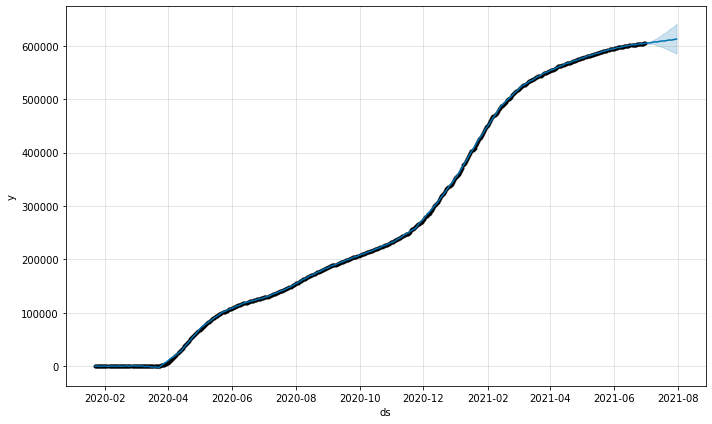

In [208]:
model_2.plot(forecast_2);

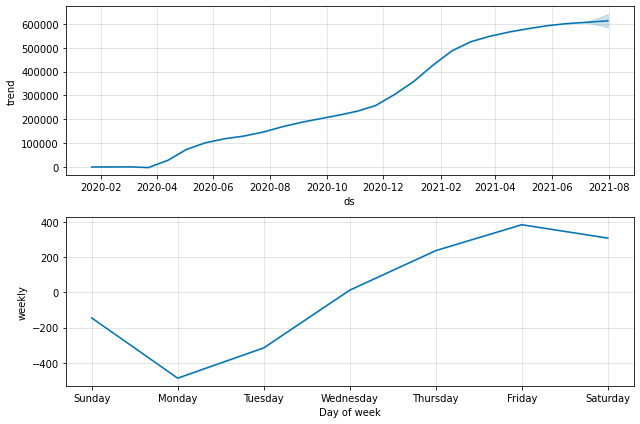

In [209]:
model_2.plot_components(forecast_2);

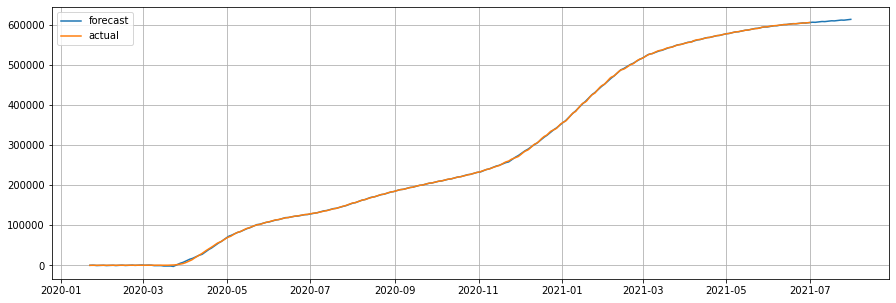

In [210]:
plt.figure(figsize=(15,5))
plt.plot(forecast_2['ds'],forecast_2['yhat'])
plt.plot(df_death_USA['ds'],df_death_USA['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

In [211]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_2, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv2 = cross_validation(model_2, cutoffs=cutoffs, horizon='150 days')
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-12-03 00:00:00 and 2021-02-01 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
131,146 days,4.328214e+10,208043.604089,167765.235314,0.280775,0.271644,0.5
132,147 days,4.406869e+10,209925.438278,168661.594109,0.282053,0.272789,0.5
133,148 days,4.487319e+10,211832.920613,169570.159782,0.283349,0.274304,0.5
134,149 days,4.569093e+10,213754.367954,170482.413894,0.284653,0.275776,0.5
135,150 days,4.651762e+10,215679.440522,171391.005822,0.285954,0.277230,0.5


In [212]:
## Model of cases in USA

In [213]:
df_cases_USA = df.query("location=='United States'")[['date','total_cases']].rename({'date':'ds' , 'total_cases':'y'} , axis=1)

In [214]:
df_cases_USA.isnull().sum()

ds    0
y     0
dtype: int64

In [215]:
df_cases_USA['y'] = df_cases_USA['y'].fillna(0)

In [216]:
model_3 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.98)
model_3.fit(df_cases_USA)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [217]:
future_3 = model_3.make_future_dataframe(periods=30)

In [218]:
forecast_3 = model_3.predict(future_3)
forecast_3[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-5.899874e+03,-9.292116e+04,8.732231e+04
1,2020-01-23,1.455072e+03,-8.521707e+04,8.934529e+04
2,2020-01-24,8.736160e+03,-7.808433e+04,9.741449e+04
3,2020-01-25,9.334611e+03,-8.618813e+04,9.419357e+04
4,2020-01-26,-1.919805e+03,-9.520281e+04,7.722190e+04
...,...,...,...,...
552,2021-07-27,3.398778e+07,3.289903e+07,3.496830e+07
553,2021-07-28,3.400339e+07,3.287461e+07,3.501135e+07
554,2021-07-29,3.402283e+07,3.279305e+07,3.505927e+07
555,2021-07-30,3.404219e+07,3.278027e+07,3.514152e+07


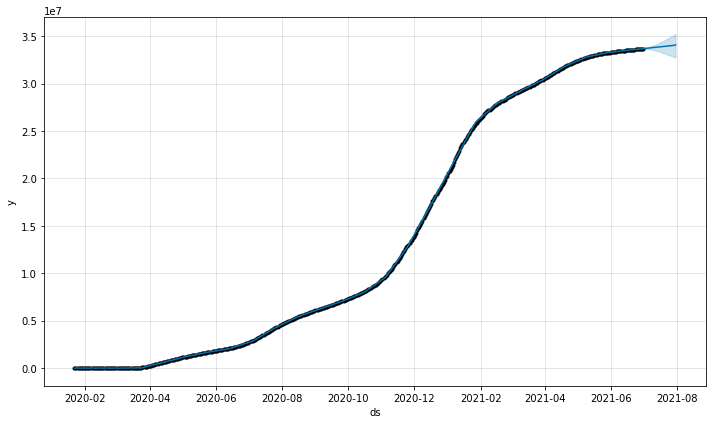

In [219]:
model_3.plot(forecast_3);

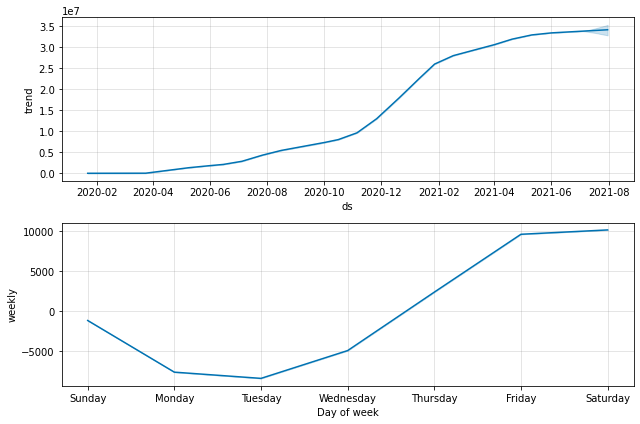

In [220]:
model_3.plot_components(forecast_3);

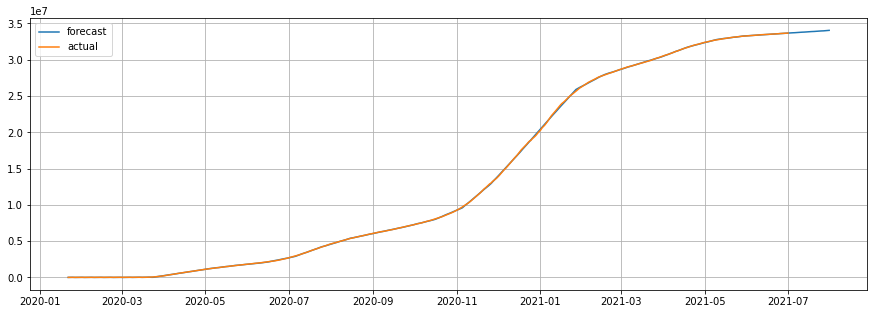

In [221]:
plt.figure(figsize=(15,5))
plt.plot(forecast_3['ds'],forecast_3['yhat'])
plt.plot(df_cases_USA['ds'],df_cases_USA['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

In [222]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model_3, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv2 = cross_validation(model_3, cutoffs=cutoffs, horizon='150 days')
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-12-03 00:00:00 and 2021-02-01 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
131,146 days,7.780514e+13,8.820722e+06,8.415205e+06,0.255396,0.254725,1.0
132,147 days,7.977157e+13,8.931493e+06,8.529975e+06,0.258679,0.257912,1.0
133,148 days,8.177649e+13,9.043035e+06,8.645602e+06,0.261984,0.261250,1.0
134,149 days,8.382245e+13,9.155460e+06,8.762338e+06,0.265323,0.264794,1.0
135,150 days,8.590309e+13,9.268392e+06,8.879580e+06,0.268675,0.268582,1.0
